In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = 'breast_cancer_survival.csv'
df = pd.read_csv(data)

In [33]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Tumour_Stage'] = label_encoder.fit_transform(df['Tumour_Stage'])
df['Histology'] = label_encoder.fit_transform(df['Histology'])
df['ER status'] = label_encoder.fit_transform(df['ER status'])
df['PR status'] = label_encoder.fit_transform(df['PR status'])
df['HER2 status'] = label_encoder.fit_transform(df['HER2 status'])
df['Surgery_type'] = label_encoder.fit_transform(df['Surgery_type'])
df['Patient_Status'] = label_encoder.fit_transform(df['Patient_Status'])

In [34]:
X = df.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status'])
y = df['Patient_Status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
rf_preds = rf_clf.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, rf_preds)
precision = precision_score(y_test, rf_preds, average='weighted')
recall = recall_score(y_test, rf_preds, average='weighted')
f1 = f1_score(y_test, rf_preds, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Random Forest Metrics:
Accuracy: 0.7761194029850746
Precision: 0.6023613276899087
Recall: 0.7761194029850746
F1-score: 0.6782892261382165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


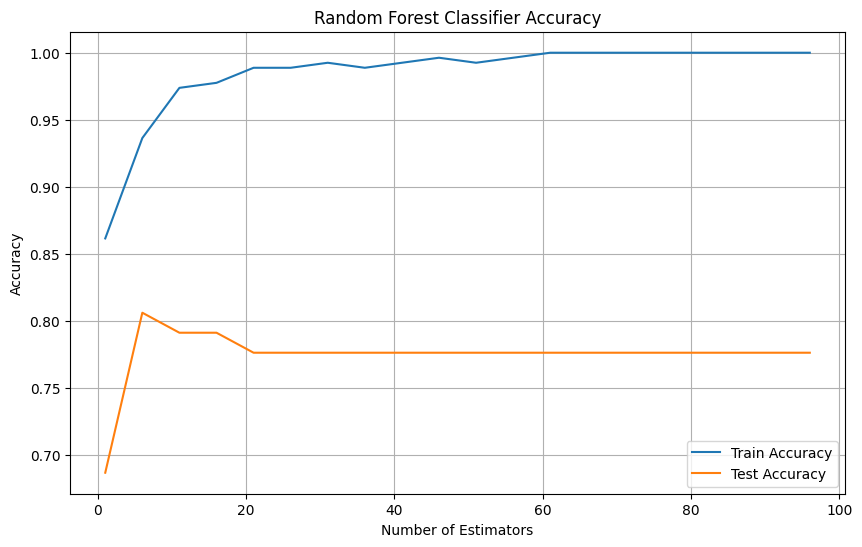

In [39]:
train_accuracy = []
test_accuracy = []
estimators_range = range(1, 100, 5)

for n_estimators in estimators_range:
    rf_clf.set_params(n_estimators=n_estimators)
    rf_clf.fit(X_train, y_train)
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(estimators_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.legend()
plt.grid(True)
plt.show()

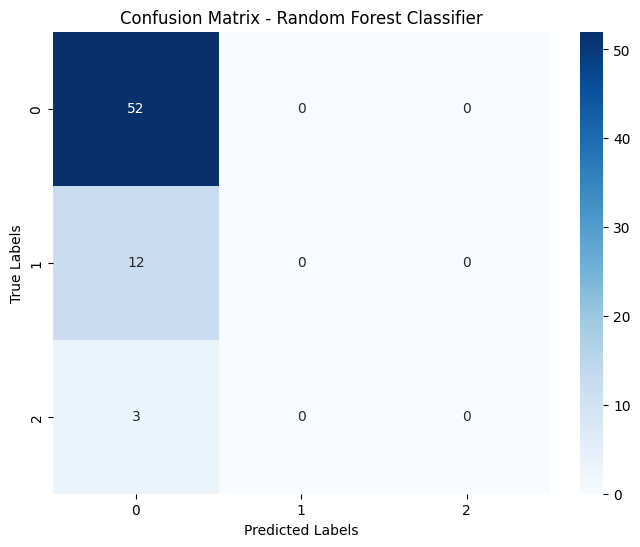

In [40]:
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()